In [5]:
import os.path as osp

In [6]:
cfg_path = '/opt/ml/code/my_code/my_faster_rcnn_efficientnet-b0_coco3.py'
wrk_path = osp.join(osp.dirname(cfg_path), f'work_dirs')
wrk_path = osp.join(wrk_path, osp.splitext(osp.basename(cfg_path))[0])
pth_path = osp.join(wrk_path, f'best_bbox_mAP_50.pth')
lst_pth_path = osp.join(wrk_path, f'epoch_18.pth')
pkl_path = osp.join(wrk_path, f'inferenced.pkl')
csv_path = osp.join(wrk_path, f'inferenced.csv')

In [7]:
print('/opt/ml/code/mmdetection_trash/my_code/work_dirs/my_faster_rcnn_x101_64x4d_fpn_1x_coco2/best_bbox_mAP_50.pth')
print(pth_path)

/opt/ml/code/mmdetection_trash/my_code/work_dirs/my_faster_rcnn_x101_64x4d_fpn_1x_coco2/best_bbox_mAP_50.pth
/opt/ml/code/mmdetection_trash/my_code/work_dirs/my_faster_rcnn_x101_64x4d_fpn_1x_coco2/best_bbox_mAP_50.pth


### 이미지 한 장 확인

https://notebook.community/open-mmlab/mmdetection/demo/MMDet_Tutorial

Use load_from_local loader


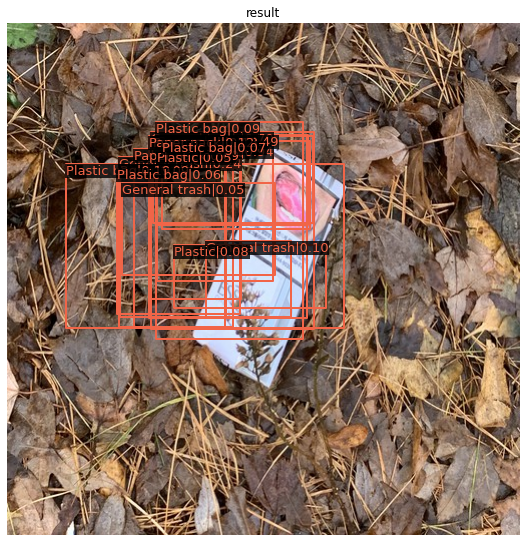

In [9]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# Choose to use a config and initialize the detector
config = cfg_path
# Setup a checkpoint file to load
checkpoint = lst_pth_path
# initialize the detector
model = init_detector(config, checkpoint, device='cuda:0')
# Use the detector to do inference
img = '/opt/ml/input/data/batch_03/0001.jpg'
result = inference_detector(model, img)
show_result_pyplot(model, img, result, score_thr=0.0)

### 잘 예측하는 사례와 잘 못 예측하는 사례 찾아보기

https://github.com/open-mmlab/mmdetection/blob/master/docs/useful_tools.md#result-analysis

python (analyze.result.py 경로) (config파일 경로) (pickle 파일 경로) (저장될 사진 경로)

In [6]:
!python /opt/ml/code/mmdetection_trash/tools/analysis_tools/analyze_results.py \
    {cfg_path} \
    {pkl_path} \
    /opt/ml/code/mmdetection_trash/my_code/work_dirs/my_faster_rcnn_x101_32x4d_fpn_1x_coco/result \
    --topk 10 \
    --show

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 837/837, 2.5 task/s, elapsed: 329s, ETA:     0sFigure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)
Figure(512.01x512.01)


### 로그 분석하기

https://github.com/open-mmlab/mmdetection/blob/master/docs/useful_tools.md#log-analysis

python (analysis_logs.py 경로) plot_curve (json로그 파일 경로) --keys --title --legend --backend --style --out

In [6]:
#bbox_mAP_50 기준으로 매 에폭마다 변화를 lineplot으로 그린 그래프를 생성합니다. (!pip install seaborn 필요)
!python \
    /opt/ml/code/mmdetection_trash/tools/analysis_tools/analyze_logs.py \
    plot_curve \
    /opt/ml/code/my_code/work_dirs/my_faster_rcnn_efficientnet-b0_coco2/20210514_141141.log.json \
    --keys bbox_mAP_50 --out log_graph2.png

plot curve of /opt/ml/code/my_code/work_dirs/my_faster_rcnn_efficientnet-b0_coco2/20210514_141141.log.json, metric is bbox_mAP_50
save curve to: log_graph2.png


python (analysis_logs.py 경로) cal_train_time (json로그 파일 경로)

In [34]:
#실행시간을 출력합니다.
!python \
    /opt/ml/code/mmdetection_trash/tools/analysis_tools/analyze_logs.py \
    cal_train_time \
    /opt/ml/code/mmdetection_trash/my_code/work_dirs/my_faster_rcnn_hrnetv2p_w32_1x_coco/20210512_170426.log.json

-----Analyze train time of /opt/ml/code/mmdetection_trash/my_code/work_dirs/my_faster_rcnn_hrnetv2p_w32_1x_coco/20210512_170426.log.json-----
slowest epoch 10, average time is 0.2654
fastest epoch 5, average time is 0.2380
time std over epochs is 0.0079
average iter time: 0.2450 s/iter

